## Mean Shift Clustering

In [4]:
# Surpress any warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import numpy as np
import cv2 as cv
from sklearn.cluster import MeanShift, estimate_bandwidth
from mpl_toolkits import mplot3d
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Pre-processing Image

In [11]:
import urllib.request
import os

# Download the image file
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/peppers.jpeg"
filename = 'peppers.jpeg'

# Download the file
urllib.request.urlretrieve(url, filename)
print(f"Downloaded {filename} successfully!")

Downloaded peppers.jpeg successfully!


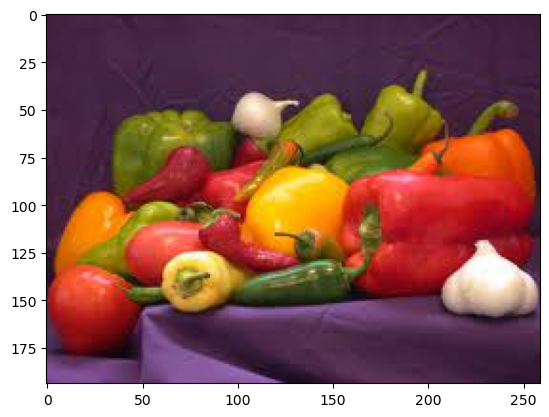

In [12]:
img = cv.imread('peppers.jpeg')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

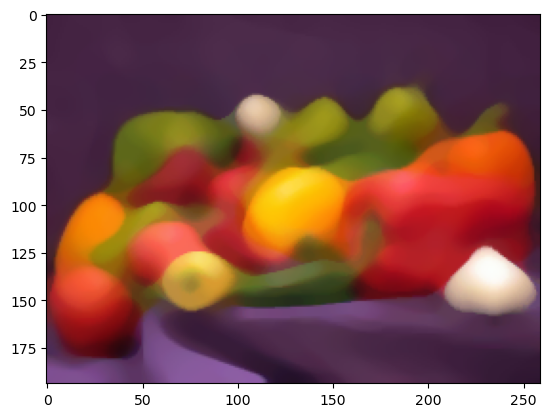

In [21]:
img = cv.medianBlur(img,7)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

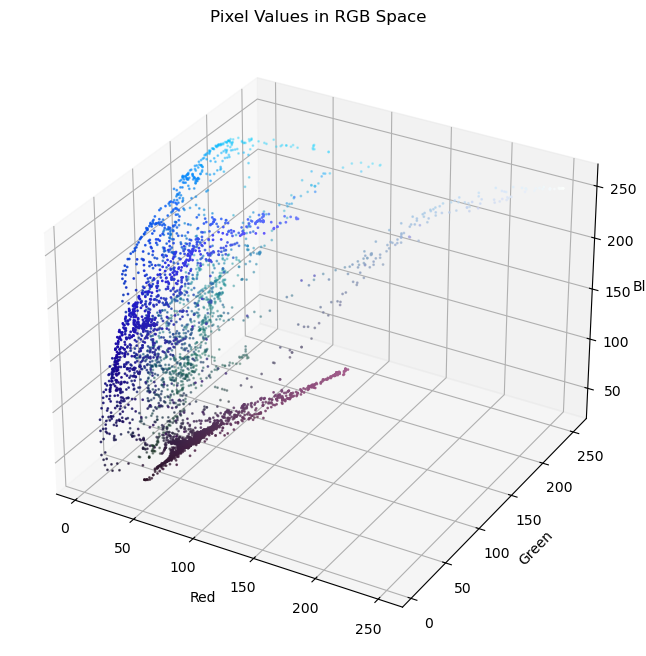

In [24]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Flatten and subsample the image data (plotting every 10th pixel to avoid overload)
step = 10
r = img[:,:,0].flatten()[::step]
g = img[:,:,1].flatten()[::step]
b = img[:,:,2].flatten()[::step]

# Ensure they are numpy arrays
r = np.asarray(r, dtype=np.float64)
g = np.asarray(g, dtype=np.float64)
b = np.asarray(b, dtype=np.float64)

ax.scatter(r, g, b, c=np.c_[r/255, g/255, b/255], marker='o', s=1)
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.set_title('Pixel Values in RGB Space')
plt.show()

In [25]:
img.shape

(194, 259, 3)

In [28]:
X = img.reshape((-1,3))
print("shape: ",X.shape)
# Access dtype.str directly to avoid the numpy.bool issue
print("data type   : ", X.dtype.str)

shape:  (50246, 3)
data type   :  |u1


In [29]:
X = np.float32(X)

In [31]:
bandwidth = estimate_bandwidth(X, quantile=.06, n_samples=3000)
bandwidth 

31.339835451731943

In [32]:
ms = MeanShift(bandwidth=bandwidth,bin_seeding=True)
ms.fit(X)

MeanShift(bandwidth=31.339835451731943, bin_seeding=True)

In [33]:
labeled=ms.labels_
labeled

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
clusters=ms.predict(X)
clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
np.unique(labeled)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [36]:
ms.cluster_centers_

array([[ 67.31064 ,  38.21321 ,  70.60503 ],
       [ 33.675667,  32.53546 , 175.67867 ],
       [ 26.149893,  92.751   ,  96.82579 ],
       [ 26.023926, 127.59003 , 141.99352 ],
       [ 43.04202 ,  60.73371 , 216.6662  ],
       [  8.744978, 137.6096  , 243.66725 ],
       [  9.364258, 182.69531 , 251.81348 ],
       [155.25507 , 182.24292 , 214.08502 ],
       [233.3314  , 242.74063 , 250.72334 ],
       [ 77.23529 , 205.6609  , 245.8097  ]], dtype=float32)

In [37]:
cluster_int8=np.uint8(ms.cluster_centers_)
cluster_int8

array([[ 67,  38,  70],
       [ 33,  32, 175],
       [ 26,  92,  96],
       [ 26, 127, 141],
       [ 43,  60, 216],
       [  8, 137, 243],
       [  9, 182, 251],
       [155, 182, 214],
       [233, 242, 250],
       [ 77, 205, 245]], dtype=uint8)

In [38]:
ms.predict(X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

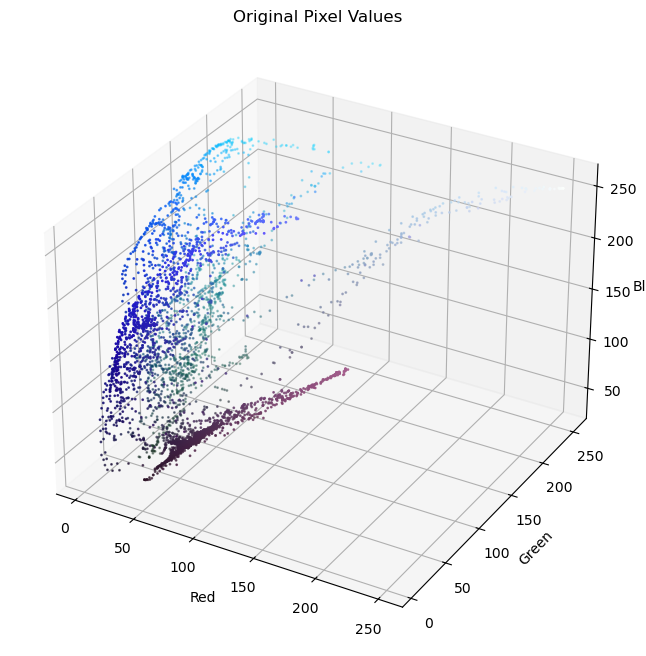

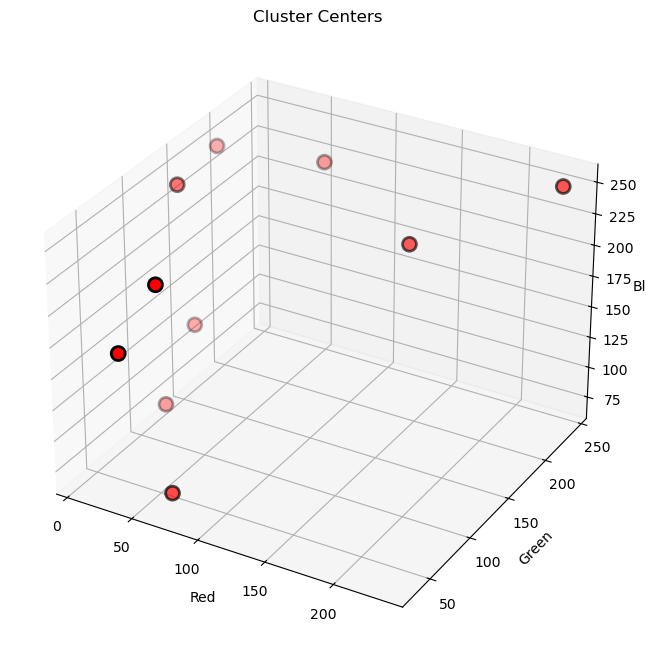

In [40]:
# Plot original pixel values
fig1 = plt.figure(figsize=(10, 8))
ax1 = fig1.add_subplot(111, projection='3d')

# Subsample the image data for visualization
step = 10
r = img[:,:,0].flatten()[::step]
g = img[:,:,1].flatten()[::step]
b = img[:,:,2].flatten()[::step]

r = np.asarray(r, dtype=np.float64)
g = np.asarray(g, dtype=np.float64)
b = np.asarray(b, dtype=np.float64)

ax1.scatter(r, g, b, c=np.c_[r/255, g/255, b/255], marker='o', s=1)
ax1.set_xlabel('Red')
ax1.set_ylabel('Green')
ax1.set_zlabel('Blue')
ax1.set_title('Original Pixel Values')
plt.show()

# Plot cluster centers
fig2 = plt.figure(figsize=(10, 8))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(cluster_int8[:,0], cluster_int8[:,1], cluster_int8[:,2], 
           c='red', marker='o', s=100, edgecolors='black', linewidth=2)
ax2.set_xlabel('Red')
ax2.set_ylabel('Green')
ax2.set_zlabel('Blue')
ax2.set_title('Cluster Centers')
plt.show()

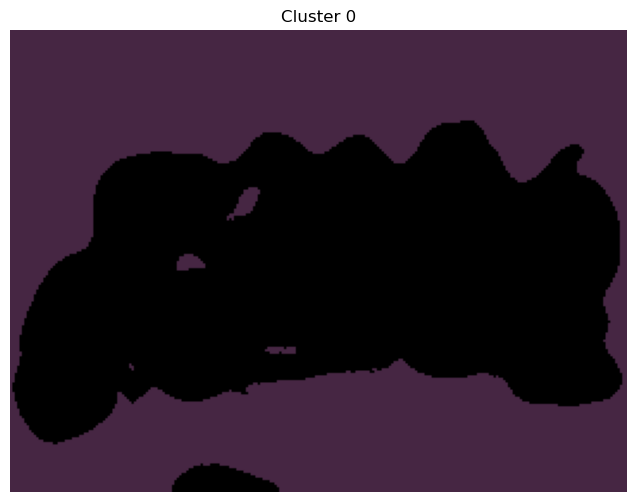

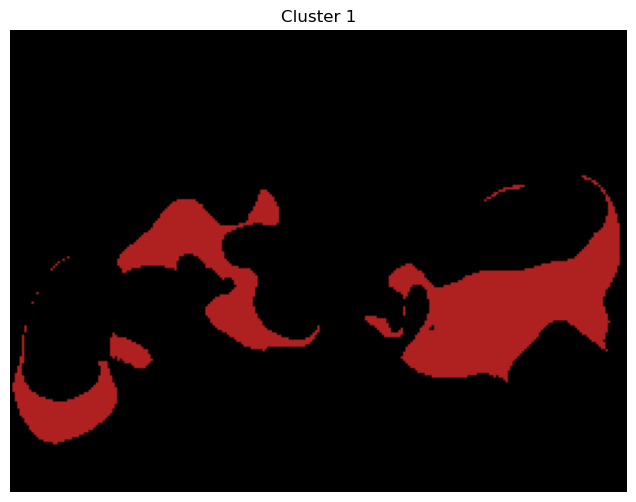

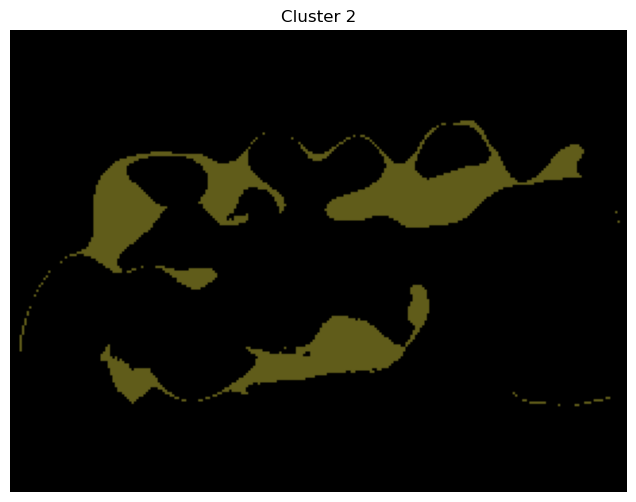

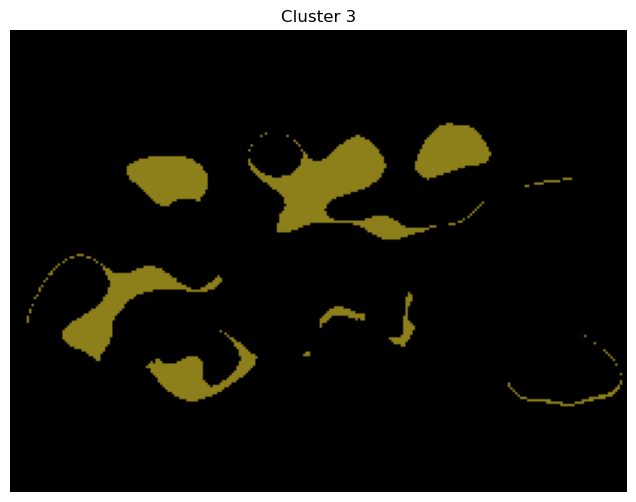

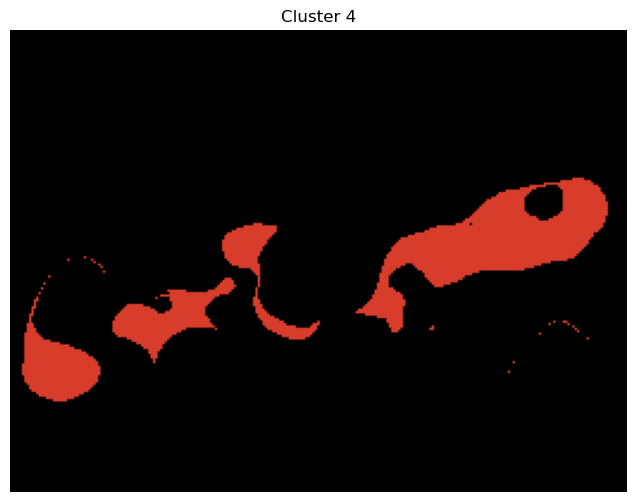

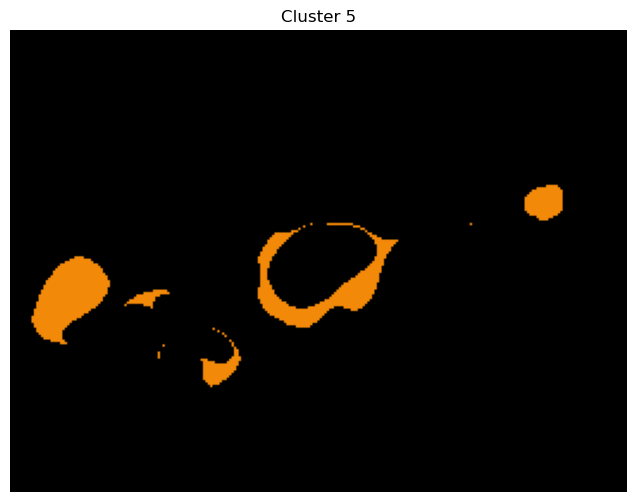

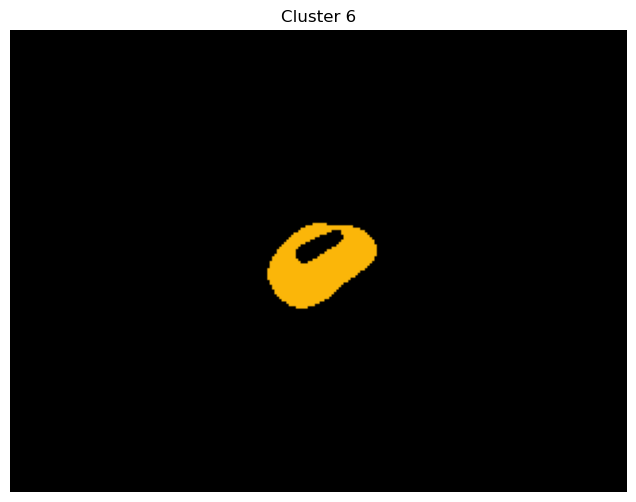

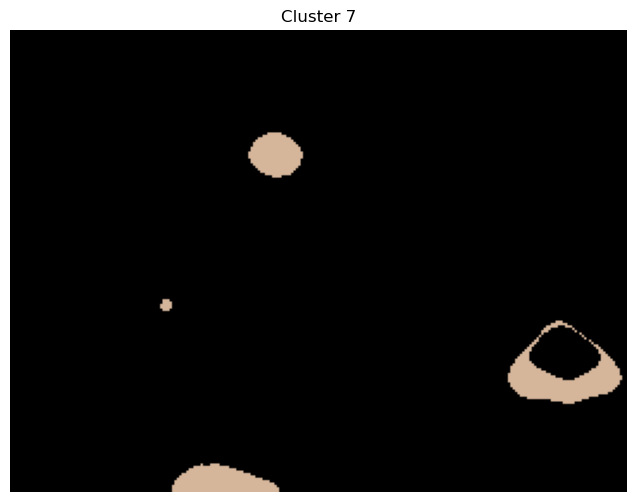

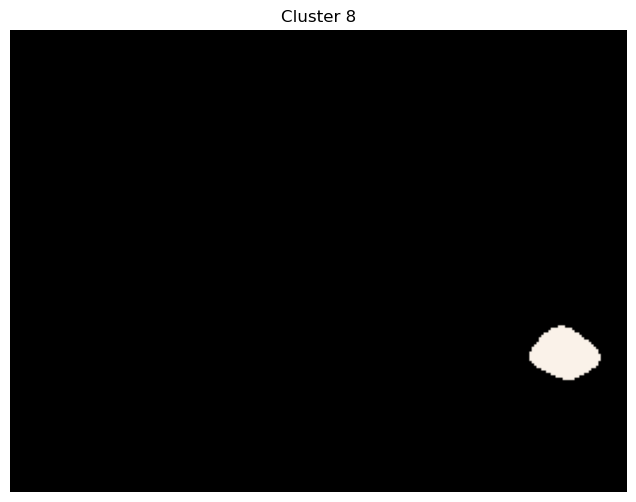

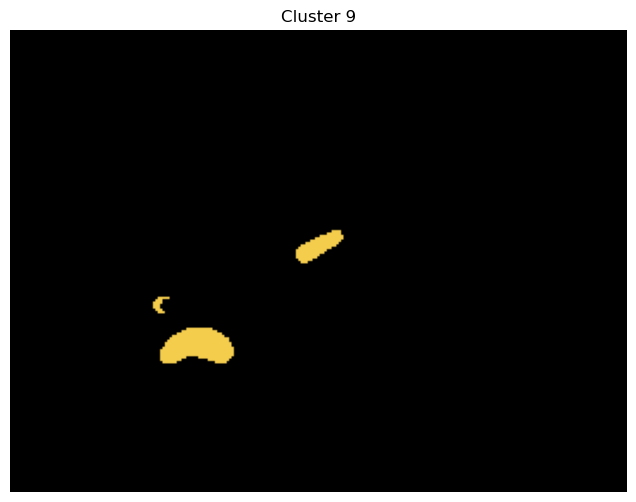

In [44]:
for label in np.unique(labeled):
    result = np.zeros(X.shape, dtype=np.uint8)
    result[labeled==label, :] = cluster_int8[label, :]  
    # Reshape back to image shape
    result_img = result.reshape(img.shape)
    # Convert to proper numpy array with correct dtype
    result_img = np.array(result_img, dtype=np.uint8, copy=True)
    
    plt.figure(figsize=(8, 6))
    # Convert BGR to RGB
    result_rgb = result_img[:, :, ::-1]  # Reverse the channel order
    plt.imshow(result_rgb)
    plt.title(f'Cluster {label}')
    plt.axis('off')
    plt.show()

## Repeat the above image segmentation process for a new image on the internet

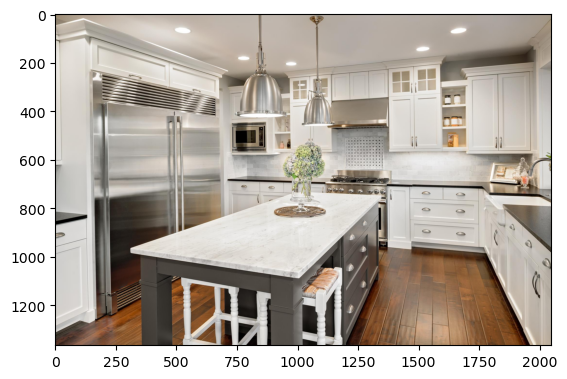

In [45]:
import requests 
url='https://www.plastform.ca/wp-content/themes/plastform/images/slider-image-2.jpg'
name="my_file.jpg"

with open(name, 'wb') as file:
    file.write(requests.get(url, stream=True).content)
    
img = cv.imread(name)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

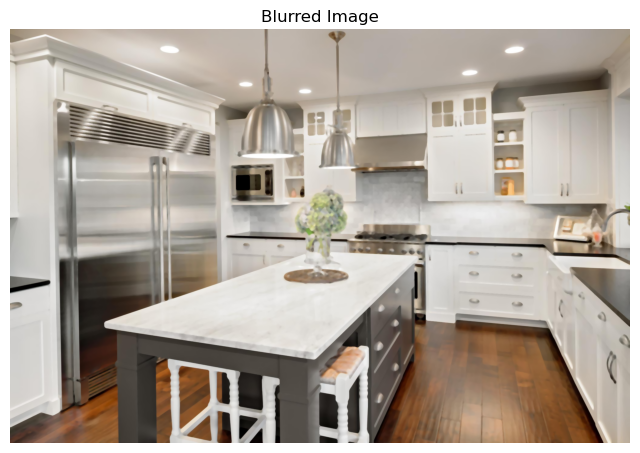

Estimated bandwidth: 18.050131050903694
Number of clusters: 11
Number of clusters: 11


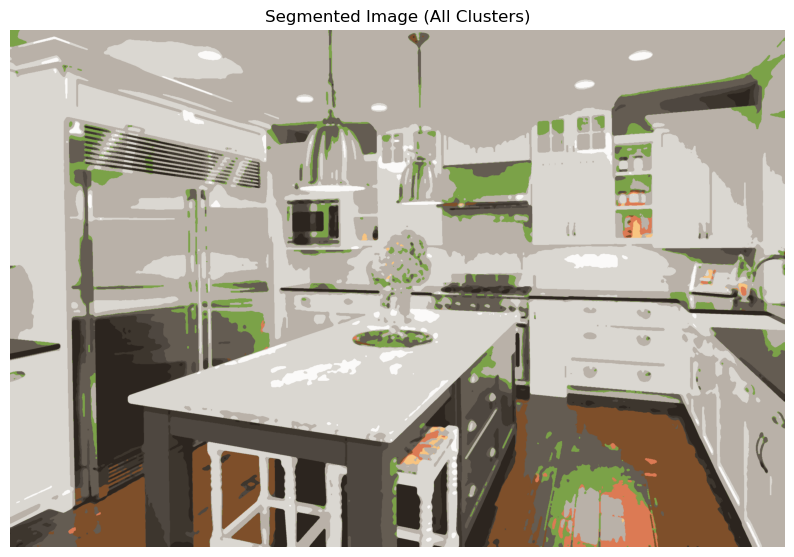

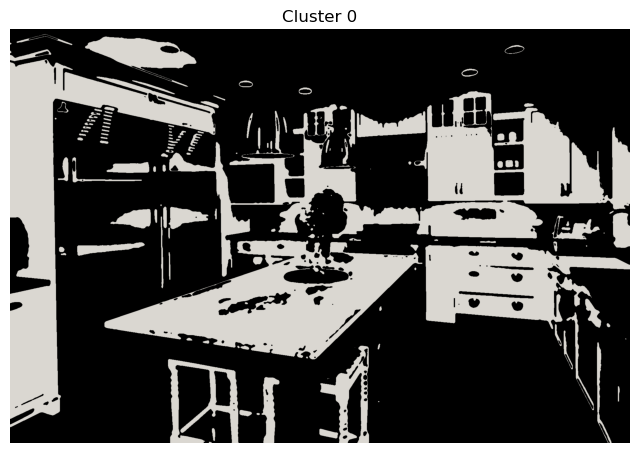

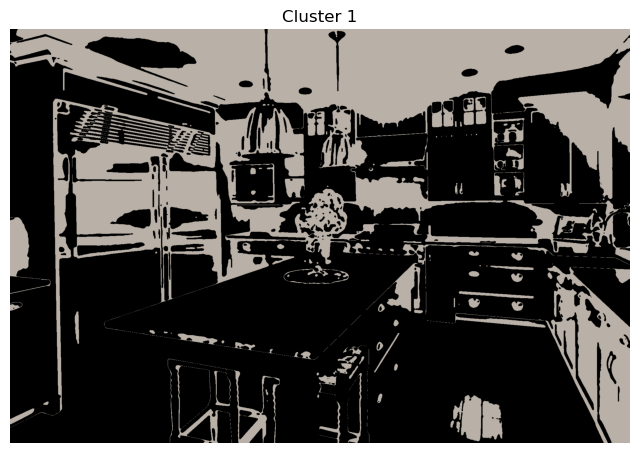

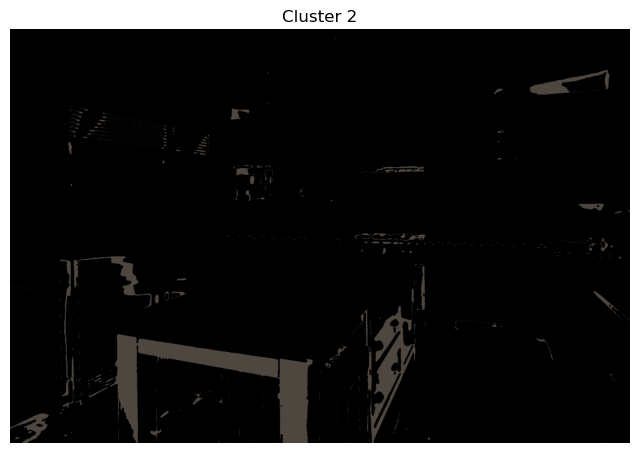

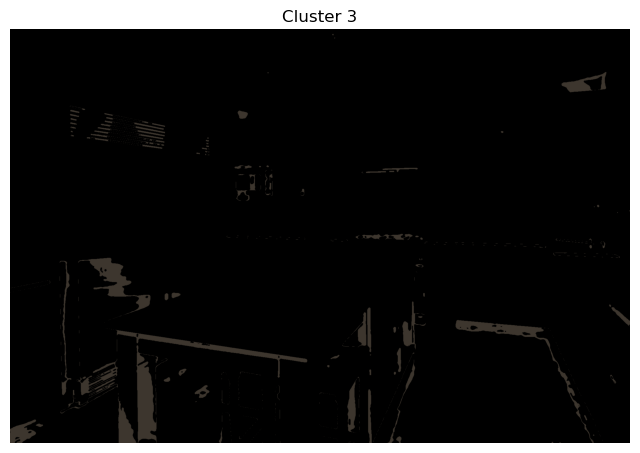

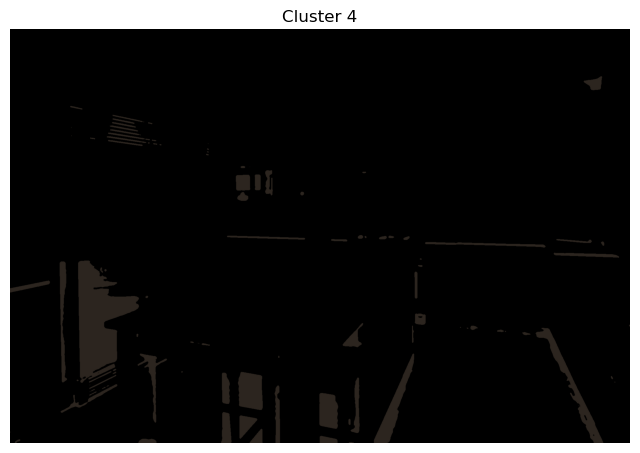

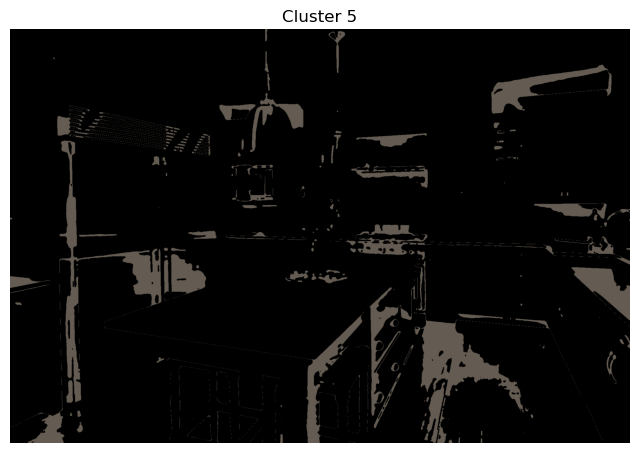

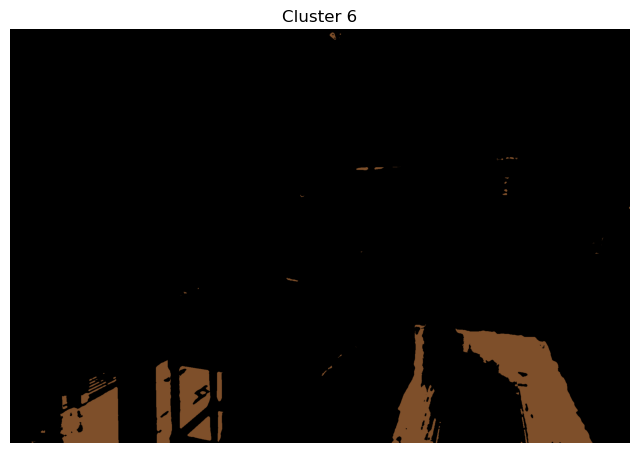

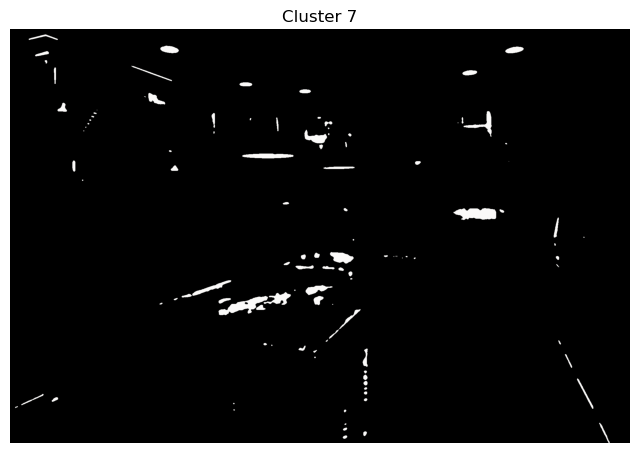

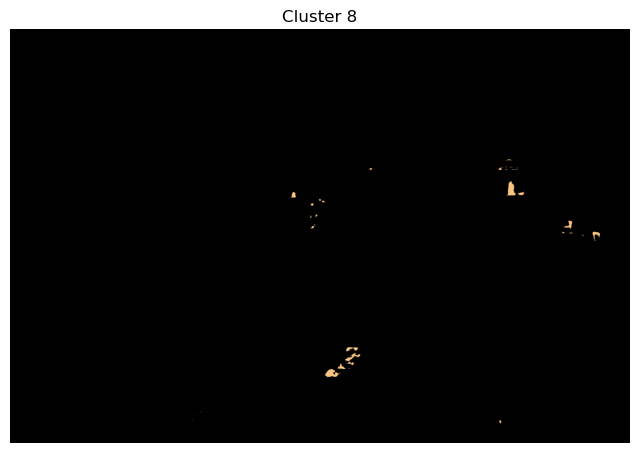

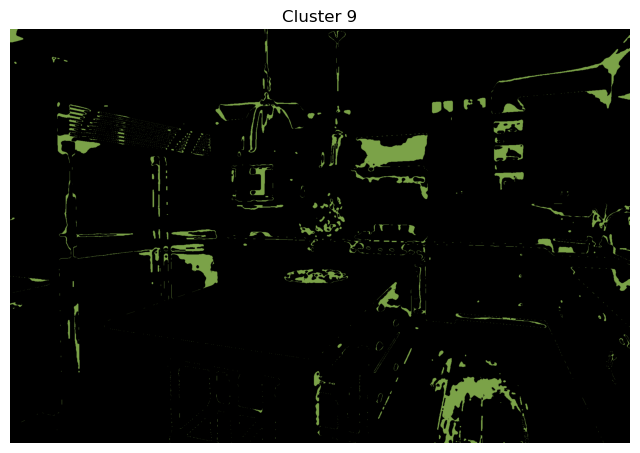

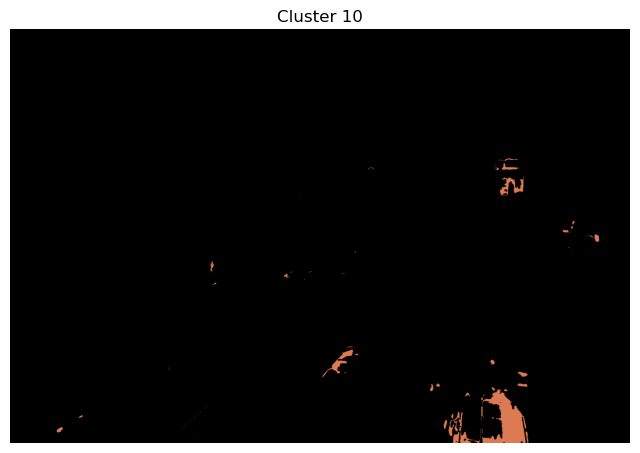

In [47]:
img = cv.medianBlur(img, 7)
plt.figure(figsize=(8, 6))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Blurred Image')
plt.axis('off')
plt.show()

# Reshape and convert to float32
X = img.reshape((-1,3))
X = np.float32(X)

# Estimate bandwidth and perform Mean Shift clustering
bandwidth = estimate_bandwidth(X, quantile=.06, n_samples=3000)
print(f"Estimated bandwidth: {bandwidth}")

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

labeled = ms.labels_
cluster_int8 = np.uint8(ms.cluster_centers_)
print(f"Number of clusters: {len(np.unique(labeled))}")

# Create segmented image with all clusters
result = np.zeros(X.shape, dtype=np.uint8)
for label in np.unique(labeled):
    result[labeled==label, :] = cluster_int8[label, :]

# Display the full segmented image
result_img = result.reshape(img.shape)
result_rgb = result_img[:, :, ::-1]  # BGR to RGB
plt.figure(figsize=(10, 8))
plt.imshow(result_rgb)
plt.title('Segmented Image (All Clusters)')
plt.axis('off')
plt.show()

# Display each cluster separately
for label in np.unique(labeled):
    result = np.zeros(X.shape, dtype=np.uint8)
    result[labeled==label, :] = cluster_int8[label, :]
    result_img = result.reshape(img.shape)
    result_rgb = result_img[:, :, ::-1]  # BGR to RGB
    
    plt.figure(figsize=(8, 6))
    plt.imshow(result_rgb)
    plt.title(f'Cluster {label}')
    plt.axis('off')
    plt.show()